In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('min_rows', 1000)

In [3]:
profit_df = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\profit\AmazonProfit2021JanMay.xlsx').drop_duplicates()

In [4]:
Jan_Feb_df = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\Az.xlsx')
April_df = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\new\April.xlsx')
May_df = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\new\May.xlsx')
June_df = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\new\June.xlsx')

In [5]:
frames = [April_df, May_df, June_df, Jan_Feb_df]

sales_df = pd.concat(frames)

In [6]:
sales_df = sales_df[(sales_df["order-status"] != 'Cancelled') & (sales_df["fulfillment-channel"] != 'Amazon')]
sales_df = sales_df[["asin", "amazon-order-id","ship-state","sku","item-price", "purchase-date"]]

In [7]:
date1 = "2020-12-31"
date2 = "2021-07-01"

In [8]:
sales_df = sales_df[(sales_df['purchase-date'] > date1) & (sales_df['purchase-date'] < date2)]

In [9]:
z = pd.merge(sales_df, profit_df, left_on=["amazon-order-id"], right_on=['order id w/o doubles'], how='inner').drop_duplicates()

In [10]:
category_listing_df = pd.read_csv(r'C:\Users\Mykola\Desktop\rollun\Category Listing_full_table.csv')
category_listing_df = category_listing_df[["Product Type", "Product ID"]]

c:\users\mykola\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (1,2,3,4,5,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,

In [11]:
a = pd.merge(z, category_listing_df, left_on=["asin"], right_on=['Product ID'], how='left').drop_duplicates()

In [23]:
amazon_inventory_df = pd.read_csv(r'C:\Users\Mykola\Desktop\rollun\AmazonInventory_full_table.csv')

conditions = [
    (amazon_inventory_df[["ct_map_price"]] > 0),
    (amazon_inventory_df[["ct_map_price"]] < 0),
]

choices = [True, False]
amazon_inventory_df[["map_used"]] = np.select(conditions, choices, default=None)
amazon_inventory_df = amazon_inventory_df[["msin", "rid","map_used","ct_map_price"]]

In [24]:
#amazon_inventory_df = pd.read_csv(r'C:\Users\Mykola\Desktop\rollun\AmazonInventory_full_table.csv')
#o = amazon_inventory_df[["ct_map_price", "msin"]].drop_duplicates()

#o.sort_values(['ct_map_price'], ascending=[False])

#o1 = (o.loc[o['ct_map_price'].isnull()])
#o2 = (o1.loc[o['ct_map_price'] < 1])
#o1

In [25]:
b = pd.merge(a, amazon_inventory_df, left_on=["asin"], right_on=['msin'], how='left').drop_duplicates()

In [26]:
central_catalog_df = pd.read_csv(r'C:\Users\Mykola\Desktop\rollun\Central Catalog_full_table.csv')
central_catalog_df = central_catalog_df[["id", "brand_id"]]

In [27]:
c = pd.merge(b, central_catalog_df, left_on=["rid"], right_on=['id'], how='left').drop_duplicates()

In [28]:
dimension_store_df = pd.read_csv(r'C:\Users\Mykola\Desktop\rollun\Dimension Store_full_table.csv')
dimension_store_df = dimension_store_df[["id", "width", "height", "length", "weight", "is_dangerous","image"]]
dimension_store_df['is_image'] = np.where(dimension_store_df['image'].notnull(), True, False)

In [29]:
d = pd.merge(c, dimension_store_df, left_on=["rid"], right_on=['id'], how='left').drop_duplicates()

In [30]:
map_rules_df = pd.read_csv(r'C:\Users\Mykola\Desktop\rollun\Map Rules_full_table.csv')
map_rules_df = map_rules_df[["brand"]]
map_rules_df['map'] = np.where(map_rules_df['brand']!= '', True, False)
map_rules_df = map_rules_df.drop_duplicates()

In [31]:
e = pd.merge(d, map_rules_df, left_on=["brand_id"], right_on=['brand'], how='left').drop_duplicates()

In [32]:
e = e[["asin", "amazon-order-id","ship-state","sku","item-price", "rid", "Product Type","brand_id", "width", "height", "length", "weight", "is_dangerous", 'map', 'is_image', "purchase-date","Gross Profit", "map_used","ct_map_price"]]

In [80]:
p1 = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\2021-07-13_PartsUnlimited.xlsx')
p1 = p1[['mpOrderNumber']]
p1['Sr name'] = np.where(p1['mpOrderNumber']!= '', 'PartsUnlimited', True)
p1['is_dropship'] = np.where(p1['mpOrderNumber']!= '', "Pickup", True)

p2 = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\2021-07-13_RollunOffice.xlsx')
p2 = p2[['mpOrderNumber']]
p2['Sr name'] = np.where(p2['mpOrderNumber']!= '', 'RollunOffice', True)
p2['is_dropship'] = np.where(p2['mpOrderNumber']!= '', "Pickup", True)

p3 = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\2021-07-13_TuckerRocky.xlsx')
p3 = p3[['mpOrderNumber']]
p3['Sr name'] = np.where(p3['mpOrderNumber']!= '', 'TuckerRocky', True)
p3['is_dropship'] = np.where(p3['mpOrderNumber']!= '', "Pickup", True)

p4 = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\2021-07-13_RockyMountain.xlsx')
p4 = p4[['mpOrderNumber']]
p4['Sr name'] = np.where(p4['mpOrderNumber']!= '', 'RockyMountain', True)
p4['is_dropship'] = np.where(p4['mpOrderNumber']!= '', "Pickup", True)

dropship_price_info_df = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\dropship.xlsx')
dropship_price_info_df = dropship_price_info_df[["MP order number", "Sr name"]]
dropship_price_info_df['is_dropship'] = np.where(dropship_price_info_df['MP order number']!= '', "Dropship", False)
dropship_price_info_df[['mpOrderNumber']] = dropship_price_info_df[['MP order number']]
dropship_price_info_df = dropship_price_info_df[['mpOrderNumber','Sr name','is_dropship']]

frames = [p1, p2, p3, p4, dropship_price_info_df]

p = pd.concat(frames)

In [81]:
f = pd.merge(e, p, left_on=["amazon-order-id"], right_on=['mpOrderNumber'], how='left').drop_duplicates()

In [82]:
j = f[f["is_dropship"] == "Pickup"]
y = f[f["is_dropship"] != "Pickup"]

j["Gross Profit"] = j["Gross Profit"] - 1

frames = [j, y]

f = pd.concat(frames)

c:\users\mykola\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.




Brands by profit between  2020-12-31  and  2021-07-01


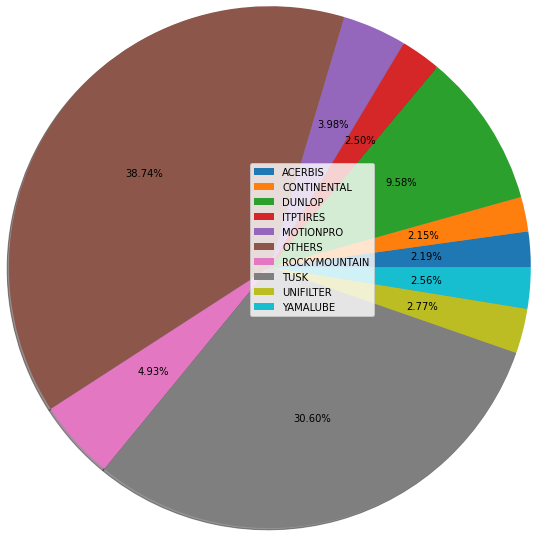

,brand_new,sum,count,percent %,mean $
0,TOTAL,100950.11,12659,100.0,8.0
5,OTHERS,39108.11,4695,38.7,8.3
7,TUSK,30888.0,4755,30.6,6.5
2,DUNLOP,9666.65,539,9.6,17.9
6,ROCKYMOUNTAIN,4978.18,271,4.9,18.4
4,MOTIONPRO,4018.3,1030,4.0,3.9
8,UNIFILTER,2799.74,525,2.8,5.3
9,YAMALUBE,2583.14,365,2.6,7.1
3,ITPTIRES,2524.03,142,2.5,17.8
0,ACERBIS,2212.09,159,2.2,13.9


In [83]:
print("")
print("")
print("Brands by profit between ", date1, " and ", date2)


df = f['Gross Profit'].groupby(f['brand_id']).agg('sum').reset_index(name='sum')
z = (df.loc[df['sum'] <= 2000]).agg('sum').reset_index(name='sum').iloc[1:]
z.columns = ['brand_id', 'sum']
z['brand_id'] = z['brand_id'].replace(['sum'],'OTHERS')

df1 = (df.loc[df['sum'] >= 2000])

df_brands = df1.rename(columns={'brand_id': 'brand_new'})
del df_brands['sum']

df2= pd.merge(f, df_brands, left_on=["brand_id"], right_on=['brand_new'], how='left').drop_duplicates()
df2['brand_new'] = df2['brand_new'].fillna("OTHERS")

df3 = df2['Gross Profit'].groupby(df2['brand_new']).agg('sum').reset_index(name='sum')
df4 = df2['Gross Profit'].groupby(df2['brand_new']).agg('count').reset_index(name='count')
p1 = pd.merge(df3, df4, left_on=["brand_new"], right_on=['brand_new'], how='inner').drop_duplicates()

plt.pie(p1['sum'], autopct='%1.2f%%',shadow=True, radius=3)
plt.legend(p1['brand_new'], loc="best")
plt.show()

p1['percent %'] = (p1['sum'] / p1['sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['brand_new'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum']/p1['count']

p1[["mean $", 'percent %']] = p1[["mean $", 'percent %']].astype(float).round(1)
p1.sort_values('sum', ascending=False).round(1)



Brands by profit between  2020-12-31  and  2021-03-31


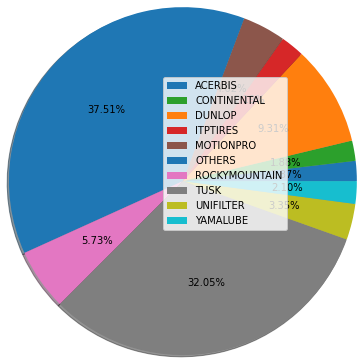



Brands by profit between  2021-03-31  and  2021-07-01


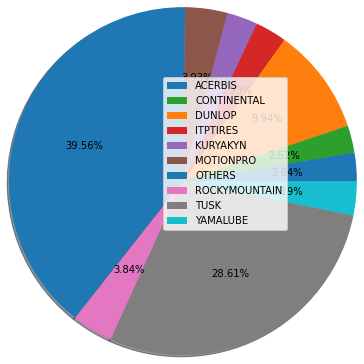



Dataframe brands by profit between  2020-12-31  and  2021-03-31


,brand_new,sum,count,percent %,mean $
0,TOTAL,58325.34,7736,100.0,7.5
5,OTHERS,21876.9,2738,37.5,8.0
7,TUSK,18692.83,3095,32.0,6.0
2,DUNLOP,5429.91,321,9.3,16.9
6,ROCKYMOUNTAIN,3343.52,196,5.7,17.1
4,MOTIONPRO,2344.0,587,4.0,4.0
8,UNIFILTER,1951.57,399,3.3,4.9
3,ITPTIRES,1277.08,71,2.2,18.0
9,YAMALUBE,1224.79,158,2.1,7.8
1,CONTINENTAL,1096.13,92,1.9,11.9




Dataframe brands by profit between  2021-03-31  and  2021-07-01


,brand_new,sum,count,percent %,mean $
0,TOTAL,42624.77,4923,100.0,8.7
6,OTHERS,16861.74,2032,39.6,8.3
8,TUSK,12195.17,1660,28.6,7.3
2,DUNLOP,4236.74,218,9.9,19.4
5,MOTIONPRO,1674.3,443,3.9,3.8
7,ROCKYMOUNTAIN,1634.66,75,3.8,21.8
9,YAMALUBE,1358.35,207,3.2,6.6
3,ITPTIRES,1246.95,71,2.9,17.6
4,KURYAKYN,1217.64,51,2.9,23.9
0,ACERBIS,1123.48,80,2.6,14.0


In [175]:
date1 = "2020-12-31"
date2 = "2021-03-31"
date3 = "2021-07-01"

f1 = f[(f['purchase-date'] > date1) & (f['purchase-date'] <= date2)]
f2 = f[(f['purchase-date'] > date2) & (f['purchase-date'] < date3)]


colours = {'ACERBIS': 'C0',
           'CALIBER': 'C1',
           'CONTINENTAL': 'C2',
           'ITPTIRES': 'C3',
           'KURYAKYN': 'C4',           
           'MOTIONPRO': 'C5',
           'ROCKYMOUNTAIN': 'C6',           
           'TUSK': 'C7',
           'UNIFILTER': 'C8',           
           'YAMALUBE': 'C9',
           'OTHERS': 'C10',       
           'DUNLOP': 'C11'}

print("")
print("")
print("Brands by profit between ", date1, " and ", date2)


df = f1['Gross Profit'].groupby(f1['brand_id']).agg('sum').reset_index(name='sum')
z = (df.loc[df['sum'] <= 1000]).agg('sum').reset_index(name='sum').iloc[1:]
z.columns = ['brand_id', 'sum']
z['brand_id'] = z['brand_id'].replace(['sum'],'OTHERS')

df1 = (df.loc[df['sum'] >= 1000])

df_brands = df1.rename(columns={'brand_id': 'brand_new'})
del df_brands['sum']

df2= pd.merge(f1, df_brands, left_on=["brand_id"], right_on=['brand_new'], how='left').drop_duplicates()
df2['brand_new'] = df2['brand_new'].fillna("OTHERS")

df3 = df2['Gross Profit'].groupby(df2['brand_new']).agg('sum').reset_index(name='sum')
df4 = df2['Gross Profit'].groupby(df2['brand_new']).agg('count').reset_index(name='count')
p1 = pd.merge(df3, df4, left_on=["brand_new"], right_on=['brand_new'], how='inner').drop_duplicates()


plt.pie(p1['sum'], autopct='%1.2f%%',shadow=True, radius=2, colors=[colours[key] for key in p1["brand_new"]])
plt.legend(p1['brand_new'], loc="best")
plt.show()

p1['percent %'] = (p1['sum'] / p1['sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['brand_new'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum']/p1['count']

p1[["mean $", 'percent %']] = p1[["mean $", 'percent %']].astype(float).round(1)
p_first = p1.sort_values('sum', ascending=False).round(1)


print("")
print("")
print("Brands by profit between ", date2, " and ", date3)



df = f2['Gross Profit'].groupby(f2['brand_id']).agg('sum').reset_index(name='sum')
z = (df.loc[df['sum'] <= 1000]).agg('sum').reset_index(name='sum').iloc[1:]
z.columns = ['brand_id', 'sum']
z['brand_id'] = z['brand_id'].replace(['sum'],'OTHERS')

df1 = (df.loc[df['sum'] >= 1000])

df_brands = df1.rename(columns={'brand_id': 'brand_new'})
del df_brands['sum']

df2= pd.merge(f2, df_brands, left_on=["brand_id"], right_on=['brand_new'], how='left').drop_duplicates()
df2['brand_new'] = df2['brand_new'].fillna("OTHERS")

df3 = df2['Gross Profit'].groupby(df2['brand_new']).agg('sum').reset_index(name='sum')
df4 = df2['Gross Profit'].groupby(df2['brand_new']).agg('count').reset_index(name='count')
p1 = pd.merge(df3, df4, left_on=["brand_new"], right_on=['brand_new'], how='inner').drop_duplicates()


plt.pie(p1['sum'], autopct='%1.2f%%',shadow=True, radius=2, colors=[colours[key] for key in p1["brand_new"]])
plt.legend(p1['brand_new'], loc="best")
plt.show()

p1['percent %'] = (p1['sum'] / p1['sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['brand_new'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum']/p1['count']

p1[["mean $", 'percent %']] = p1[["mean $", 'percent %']].astype(float).round(1)



print("")
print("")
print("Dataframe brands by profit between ", date1, " and ", date2)
display(p_first)



print("")
print("")
p_second = p1.sort_values('sum', ascending=False).round(1)
print("Dataframe brands by profit between ", date2, " and ", date3)
display(p_second)



Suppliers by profit between  2020-12-31  and  2021-07-01


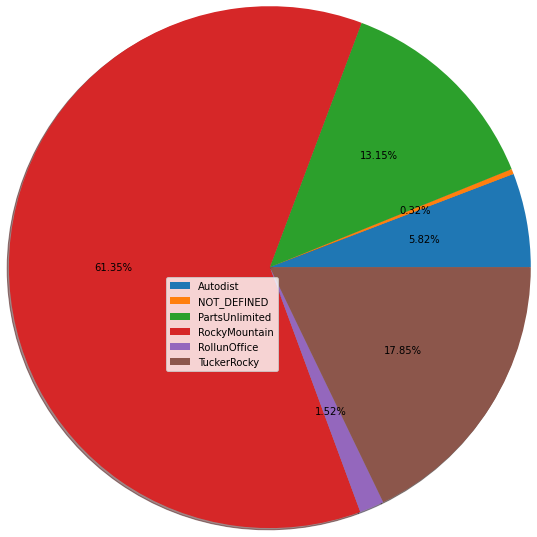

,Sr name,sum,count,percent %,mean $
0,TOTAL,101291.95,12639,100.0,8.0
3,RockyMountain,62142.33,8048,61.3,7.7
5,TuckerRocky,18076.52,1467,17.8,12.3
2,PartsUnlimited,13316.68,1481,13.1,9.0
0,Autodist,5890.51,1164,5.8,5.1
4,RollunOffice,1542.13,452,1.5,3.4
1,NOT_DEFINED,323.78,27,0.3,12.0


In [89]:
print("")
print("")
print("Suppliers by profit between ", date1, " and ", date2)

l = (f.loc[(f['Sr name'] != "RockyMountainRetail")&(f['Sr name'] != "Wps")&(f['Sr name'] != "other")])

df2 = l.copy()
df2['Sr name'] = df2['Sr name'].fillna("NOT_DEFINED")

df3 = df2['Gross Profit'].groupby(df2['Sr name']).agg('sum').reset_index(name='sum')
df4 = df2['Gross Profit'].groupby(df2['Sr name']).agg('count').reset_index(name='count')
p1 = pd.merge(df3, df4, left_on=["Sr name"], right_on=['Sr name'], how='inner').drop_duplicates()

plt.pie(p1['sum'], autopct='%1.2f%%',shadow=True, radius=3)
plt.legend(p1['Sr name'], loc="best")
plt.show()

p1['percent %'] = (p1['sum'] / p1['sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['Sr name'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum']/p1['count']

p1[["mean $", 'percent %']] = p1[["mean $", 'percent %']].astype(float).round(1)
p1.sort_values('sum', ascending=False).round(1)



Suppliers by profit between  2020-12-31  and  2021-03-31


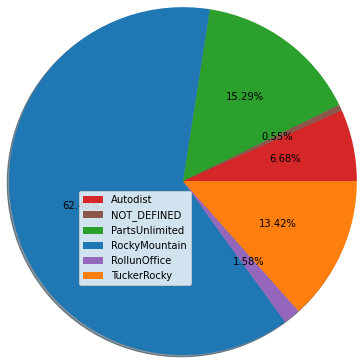

Suppliers by profit between  2021-03-31  and  2021-07-01


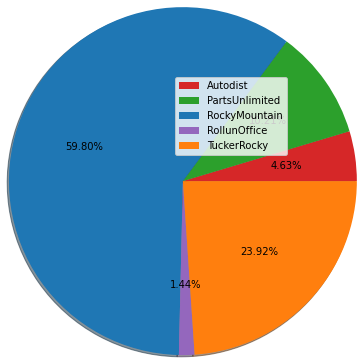



Dataframe Suppliers by profit between  2020-12-31  and  2021-03-31


,Sr name,sum,count,percent %,mean $
0,TOTAL,58629.53,7722,100.0,7.6
3,RockyMountain,36631.91,5044,62.5,7.3
2,PartsUnlimited,8962.16,910,15.3,9.8
5,TuckerRocky,7870.29,700,13.4,11.2
0,Autodist,3915.24,750,6.7,5.2
4,RollunOffice,926.15,291,1.6,3.2
1,NOT_DEFINED,323.78,27,0.6,12.0




Dataframe Suppliers by profit between  2021-03-31  and  2021-07-01


,Sr name,sum,count,percent %,mean $
0,TOTAL,42662.42,4917,100.0,8.7
2,RockyMountain,25510.42,3004,59.8,8.5
4,TuckerRocky,10206.23,767,23.9,13.3
1,PartsUnlimited,4354.52,571,10.2,7.6
0,Autodist,1975.27,414,4.6,4.8
3,RollunOffice,615.98,161,1.4,3.8


In [178]:
date1 = "2020-12-31"
date2 = "2021-03-31"
date3 = "2021-07-01"

f1 = f[(f['purchase-date'] > date1) & (f['purchase-date'] <= date2)]
f2 = f[(f['purchase-date'] > date2) & (f['purchase-date'] < date3)]


colours = {'RockyMountain': 'C0',
           'TuckerRocky': 'C1',
           'PartsUnlimited': 'C2',
           'Autodist': 'C3',
           'RollunOffice': 'C4',           
           'NOT_DEFINED': 'C5'}



print("")
print("")
print("Suppliers by profit between ", date1, " and ", date2)

l = (f1.loc[(f1['Sr name'] != "RockyMountainRetail")&(f1['Sr name'] != "Wps")&(f1['Sr name'] != "other")])

df2 = l.copy()
df2['Sr name'] = df2['Sr name'].fillna("NOT_DEFINED")

df3 = df2['Gross Profit'].groupby(df2['Sr name']).agg('sum').reset_index(name='sum')
df4 = df2['Gross Profit'].groupby(df2['Sr name']).agg('count').reset_index(name='count')
p1 = pd.merge(df3, df4, left_on=["Sr name"], right_on=['Sr name'], how='inner').drop_duplicates()

plt.pie(p1['sum'], autopct='%1.2f%%',shadow=True, radius=2, colors=[colours[key] for key in p1["Sr name"]])
plt.legend(p1['Sr name'], loc="best")
plt.show()

p1['percent %'] = (p1['sum'] / p1['sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['Sr name'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum']/p1['count']

p1[["mean $", 'percent %']] = p1[["mean $", 'percent %']].astype(float).round(1)
p_first = p1.sort_values('sum', ascending=False).round(1)



print("Suppliers by profit between ", date2, " and ", date3)

l = (f2.loc[(f2['Sr name'] != "RockyMountainRetail")&(f2['Sr name'] != "Wps")&(f2['Sr name'] != "other")])

df2 = l.copy()
df2['Sr name'] = df2['Sr name'].fillna("NOT_DEFINED")

df3 = df2['Gross Profit'].groupby(df2['Sr name']).agg('sum').reset_index(name='sum')
df4 = df2['Gross Profit'].groupby(df2['Sr name']).agg('count').reset_index(name='count')
p1 = pd.merge(df3, df4, left_on=["Sr name"], right_on=['Sr name'], how='inner').drop_duplicates()

plt.pie(p1['sum'], autopct='%1.2f%%',shadow=True, radius=2, colors=[colours[key] for key in p1["Sr name"]])
plt.legend(p1['Sr name'], loc="best")
plt.show()

p1['percent %'] = (p1['sum'] / p1['sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['Sr name'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum']/p1['count']

p1[["mean $", 'percent %']] = p1[["mean $", 'percent %']].astype(float).round(1)
p_second = p1.sort_values('sum', ascending=False).round(1)




print("")
print("")
print("Dataframe Suppliers by profit between ", date1, " and ", date2)
display(p_first)



print("")
print("")
p_second = p1.sort_values('sum', ascending=False).round(1)
print("Dataframe Suppliers by profit between ", date2, " and ", date3)
display(p_second)




Dropship/pickup by profit between  2020-12-31  and  2021-07-01


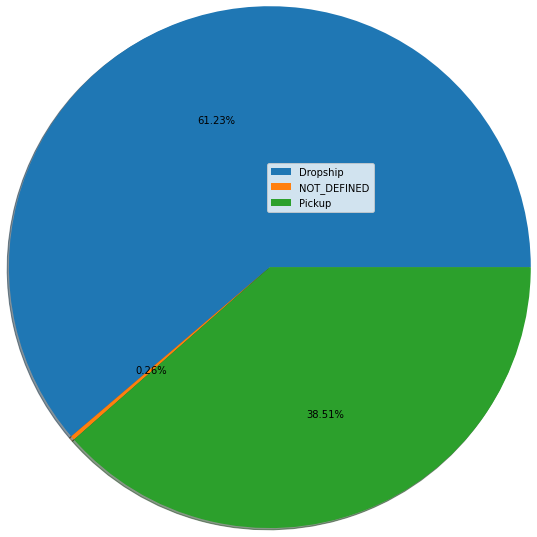

,is_dropship,sum,count,percent %,mean $
0,TOTAL,100950.11,12659,100.0,8.0
0,Dropship,61810.9,4748,61.2,13.0
2,Pickup,38876.54,7890,38.5,4.9
1,NOT_DEFINED,262.67,21,0.3,12.5


In [85]:
print("")
print("")
print("Dropship/pickup by profit between ", date1, " and ", date2)

df2 = f.copy()
df2['is_dropship'] = df2['is_dropship'].fillna("NOT_DEFINED")

df3 = df2['Gross Profit'].groupby(df2['is_dropship']).agg('sum').reset_index(name='sum')
df4 = df2['Gross Profit'].groupby(df2['is_dropship']).agg('count').reset_index(name='count')
p1 = pd.merge(df3, df4, left_on=["is_dropship"], right_on=['is_dropship'], how='inner').drop_duplicates()

plt.pie(p1['sum'], autopct='%1.2f%%',shadow=True, radius=3)
plt.legend(p1['is_dropship'], loc="best")
plt.show()

p1['percent %'] = (p1['sum'] / p1['sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['is_dropship'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum']/p1['count']

p1[["mean $", 'percent %']] = p1[["mean $", 'percent %']].astype(float).round(1)
p1.sort_values('sum', ascending=False).round(1)



Profit by groups. Groups defined by value of the item-price between  2020-12-31  and  2021-03-31


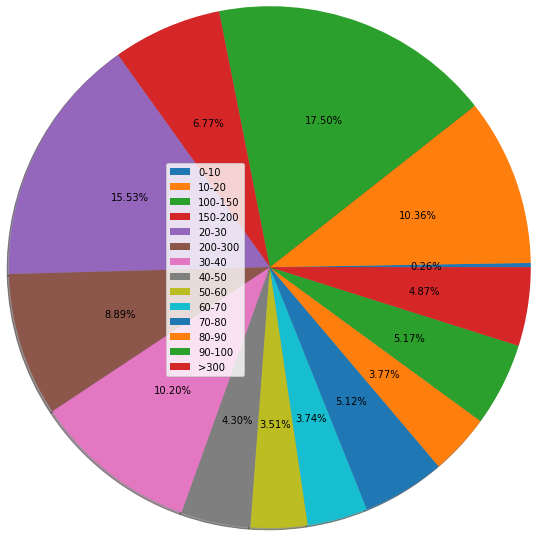

,Item-price,profit sum,count,percent profit %,mean profit $
0,TOTAL,100950.11,12659,100.0,8.0
13,>300,4920.09,64,4.9,76.9
12,90-100,5220.48,332,5.2,15.7
11,80-90,3806.65,307,3.8,12.4
10,70-80,5168.53,433,5.1,11.9
9,60-70,3775.0,334,3.7,11.3
8,50-60,3548.11,355,3.5,10.0
7,40-50,4339.34,446,4.3,9.7
6,30-40,10293.16,1606,10.2,6.4
5,200-300,8976.28,249,8.9,36.0


In [179]:
print("")
print("")
print("Profit by groups. Groups defined by value of the item-price between ", date1, " and ", date2)

f.loc[f['item-price'] <= 10, 'Item-price'] = "0-10"
f.loc[(f['item-price'] > 10)&(f['item-price'] <= 20) , 'Item-price'] = "10-20"
f.loc[(f['item-price'] > 20)&(f['item-price'] <= 30), 'Item-price'] = "20-30"
f.loc[(f['item-price'] > 30)&(f['item-price'] <= 40) , 'Item-price'] = "30-40"
f.loc[(f['item-price'] > 40)&(f['item-price'] <= 50), 'Item-price'] = "40-50"
f.loc[(f['item-price'] > 50)&(f['item-price'] <= 60) , 'Item-price'] = "50-60"
f.loc[(f['item-price'] > 60)&(f['item-price'] <= 70), 'Item-price'] = "60-70"
f.loc[(f['item-price'] > 70)&(f['item-price'] <= 80) , 'Item-price'] = "70-80"
f.loc[(f['item-price'] > 80)&(f['item-price'] <= 90), 'Item-price'] = "80-90"
f.loc[(f['item-price'] > 90)&(f['item-price'] <= 100), 'Item-price'] = "90-100"
f.loc[(f['item-price'] > 100)&(f['item-price'] <= 150) , 'Item-price'] = "100-150"
f.loc[(f['item-price'] > 150)&(f['item-price'] <= 200), 'Item-price'] = "150-200"
f.loc[(f['item-price'] > 200)&(f['item-price'] <= 300), 'Item-price'] = "200-300"
f.loc[(f['item-price'] > 300), 'Item-price'] = ">300"


df3 = f['Gross Profit'].groupby(f['Item-price']).agg('sum').reset_index(name='profit sum')
df4 = f['Gross Profit'].groupby(f['Item-price']).agg('count').reset_index(name='count')
p1 = pd.merge(df3, df4, left_on=["Item-price"], right_on=['Item-price'], how='inner').drop_duplicates()

plt.pie(p1['profit sum'], autopct='%1.2f%%',shadow=True, radius=3)
plt.legend(p1['Item-price'], loc="best")
plt.show()

p1['percent profit %'] = (p1['profit sum'] / p1['profit sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['Item-price'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean profit $"] = p1['profit sum']/p1['count']

p1[["mean profit $", 'percent profit %']] = p1[["mean profit $", 'percent profit %']].astype(float).round(1)
p1.sort_values('Item-price', ascending=False).round(1)



Profit by groups. Groups defined by value of the item-price between  2020-12-31  and  2021-07-01


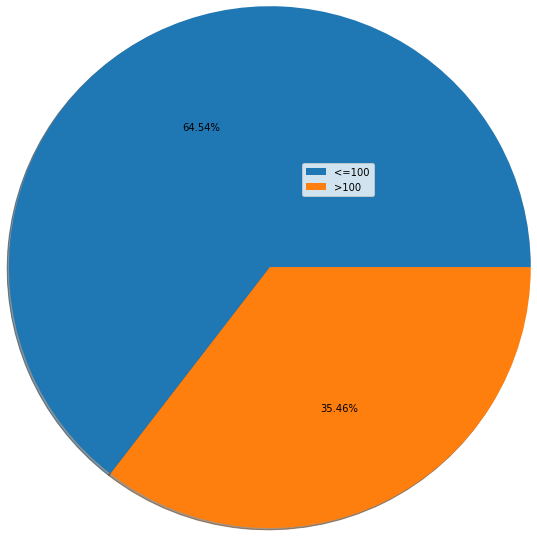

,Item-price,profit sum,count,percent profit %,mean profit $
0,TOTAL,108634.01,12516,100.0,8.7
1,>100,38521.73,1353,35.5,28.5
0,<=100,70112.28,11163,64.5,6.3


In [38]:
print("")
print("")
print("Profit by groups. Groups defined by value of the item-price between ", date1, " and ", date2)

f.loc[f['item-price'] <= 100, 'Item-price'] = "<=100"
f.loc[(f['item-price'] > 100), 'Item-price'] = ">100"


df3 = f['Gross Profit'].groupby(f['Item-price']).agg('sum').reset_index(name='profit sum')
df4 = f['Gross Profit'].groupby(f['Item-price']).agg('count').reset_index(name='count')
p1 = pd.merge(df3, df4, left_on=["Item-price"], right_on=['Item-price'], how='inner').drop_duplicates()

plt.pie(p1['profit sum'], autopct='%1.2f%%',shadow=True, radius=3)
plt.legend(p1['Item-price'], loc="best")
plt.show()

p1['percent profit %'] = (p1['profit sum'] / p1['profit sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['Item-price'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean profit $"] = p1['profit sum']/p1['count']

p1[["mean profit $", 'percent profit %']] = p1[["mean profit $", 'percent profit %']].astype(float).round(1)
p1.sort_values('Item-price', ascending=False).round(1)



Distribution by products which generate 100 % of profit. Number of products:  2376  Date Between  2020-12-31  and  2021-07-01


<AxesSubplot:>

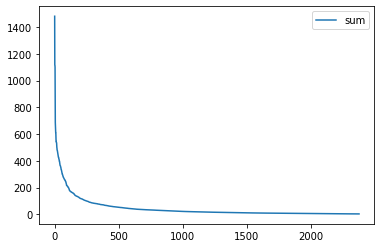

In [39]:
persent = 1

df5 = f['Gross Profit'].groupby(f['asin']).agg('sum').reset_index(name='sum')
df6 = f['Gross Profit'].groupby(f['asin']).agg('count').reset_index(name='count')
df = pd.merge(df5, df6, left_on=["asin"], right_on=['asin'], how='inner').drop_duplicates()
df = df.sort_values(by=['sum'], ascending=False).reset_index()
del df['index']


df1 = pd.DataFrame({'asin': [], 'sum': []})
b = df["sum"].sum()*persent
a = 0
for index, row in df.iterrows():
    
    if a < b:
        df1 = df1.append(row, ignore_index=True)
        a = a + row['sum']   

        
        
print("")
print("")      
print("Distribution by products which generate", persent*100, "% of profit. Number of products: ", df1["asin"].count(),  " Date Between ", date1, " and ", date2)        
df1.plot(y='sum')      



Profit by products. 189 products generate 50.0 % of profit. Date Between  2020-12-31  and  2021-03-31


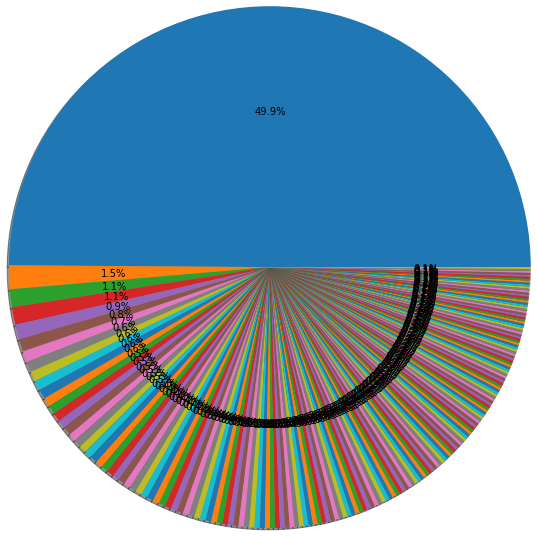

,asin,count,sum,percent %,mean $
0,TOTAL,7369,100950.11,100.0,13.7
1,OTHERS,2479,50362.29,49.9,20.3
2,B00YNTVRK6,50,1480.65,1.5,29.6
3,B07PQXK6Y3,104,1113.85,1.1,10.7
4,B008QS9NEW,186,1100.85,1.1,5.9
5,B07MKPR3Y5,181,917.99,0.9,5.1
6,B00PTVUMPI,24,787.62,0.8,32.8
7,B000GZKFD6,31,686.84,0.7,22.2
8,B06XC756LG,17,655.11,0.6,38.5
9,B06XC3HFNF,17,623.18,0.6,36.7


In [180]:
persent = 0.5

df5 = f['Gross Profit'].groupby(f['asin']).agg('sum').reset_index(name='sum')
df6 = f['Gross Profit'].groupby(f['asin']).agg('count').reset_index(name='count')
df = pd.merge(df5, df6, left_on=["asin"], right_on=['asin'], how='inner').drop_duplicates()
df = df.sort_values(by=['sum'], ascending=False).reset_index()
del df['index']


df1 = pd.DataFrame({'asin': [], 'sum': []})
b = df["sum"].sum()*persent
a = 0
for index, row in df.iterrows():
    
    if a < b:
        df1 = df1.append(row, ignore_index=True)
        a = a + row['sum']      
        
df1['group'] = 'A'  

df2= pd.merge(df, df1, left_on=["asin"], right_on=['asin'], how='left').drop_duplicates()
df2['group'] = df2['group'].fillna("B")
del df2['sum_y']
df2.rename(columns={'sum_x': 'sum'}, inplace=True)
del df2['count_y']
df2.rename(columns={'count_x': 'count'}, inplace=True)

o = (df2.loc[df2['group'] == "B"]).agg('count').reset_index(name='count').iloc[1:]
o.columns = ['asin', 'count']
o['asin'] = o['asin'].replace(['count'],'OTHERS')
o = (o.loc[o['asin'] == "OTHERS"])

z = (df2.loc[df2['group'] == "B"]).agg('sum').reset_index(name='sum').iloc[1:]
z.columns = ['asin', 'sum']
z['asin'] = z['asin'].replace(['sum'],'OTHERS')
z = z.loc[z['asin'] == "OTHERS"]

x = pd.merge(o, z, left_on=["asin"], right_on=['asin'], how='left').drop_duplicates()

df3 = (df2.loc[df2['group'] == "A"])
df4 = df3[["asin","sum","count"]]

frames1 = [x, df4]
p1 = pd.concat(frames1)

print("")
print("")
print("Profit by products.", p1["asin"].count(), "products generate", persent*100, "% of profit.", "Date Between ", date1, " and ", date2)

plt.pie(p1['sum'], autopct='%1.1f%%',shadow=True, radius=3)
#plt.legend(p1['asin'], loc="best")
plt.show()


p1['percent %'] = (p1['sum'] / p1['sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['asin'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum']/p1['count']

p1[["mean $", 'percent %']] = p1[["mean $", 'percent %']].astype(float).round(1)
p1 = p1.sort_values('sum', ascending=False).round(1).reset_index()
del p1['index']
p1



Profit by products. 189 products generate 50.0 % of profit. Date Between  2020-12-31  and  2021-03-31


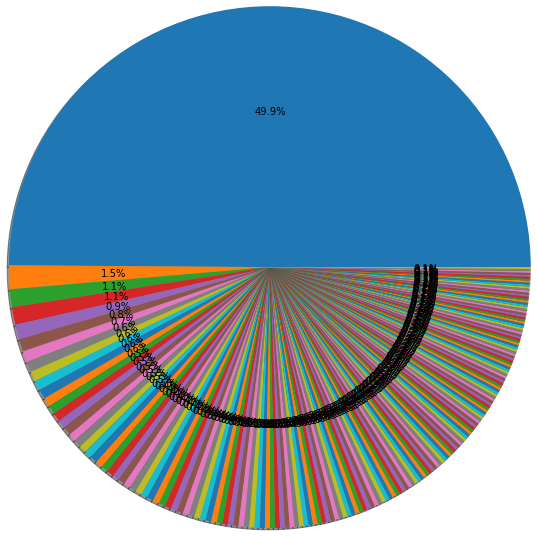

,asin,count,sum,percent %,mean $
0,TOTAL,7369,100950.11,100.0,13.7
1,OTHERS,2479,50362.29,49.9,20.3
2,B00YNTVRK6,50,1480.65,1.5,29.6
3,B07PQXK6Y3,104,1113.85,1.1,10.7
4,B008QS9NEW,186,1100.85,1.1,5.9
5,B07MKPR3Y5,181,917.99,0.9,5.1
6,B00PTVUMPI,24,787.62,0.8,32.8
7,B000GZKFD6,31,686.84,0.7,22.2
8,B06XC756LG,17,655.11,0.6,38.5
9,B06XC3HFNF,17,623.18,0.6,36.7


In [181]:
persent = 0.5

df5 = f['Gross Profit'].groupby(f['asin']).agg('sum').reset_index(name='sum')
df6 = f['Gross Profit'].groupby(f['asin']).agg('count').reset_index(name='count')
df = pd.merge(df5, df6, left_on=["asin"], right_on=['asin'], how='inner').drop_duplicates()
df = df.sort_values(by=['sum'], ascending=False).reset_index()
del df['index']


df1 = pd.DataFrame({'asin': [], 'sum': []})
b = df["sum"].sum()*persent
a = 0
for index, row in df.iterrows():
    
    if a < b:
        df1 = df1.append(row, ignore_index=True)
        a = a + row['sum']      
        
df1['group'] = 'A'  

df2= pd.merge(df, df1, left_on=["asin"], right_on=['asin'], how='left').drop_duplicates()
df2['group'] = df2['group'].fillna("B")
del df2['sum_y']
df2.rename(columns={'sum_x': 'sum'}, inplace=True)
del df2['count_y']
df2.rename(columns={'count_x': 'count'}, inplace=True)

o = (df2.loc[df2['group'] == "B"]).agg('count').reset_index(name='count').iloc[1:]
o.columns = ['asin', 'count']
o['asin'] = o['asin'].replace(['count'],'OTHERS')
o = (o.loc[o['asin'] == "OTHERS"])

z = (df2.loc[df2['group'] == "B"]).agg('sum').reset_index(name='sum').iloc[1:]
z.columns = ['asin', 'sum']
z['asin'] = z['asin'].replace(['sum'],'OTHERS')
z = z.loc[z['asin'] == "OTHERS"]

x = pd.merge(o, z, left_on=["asin"], right_on=['asin'], how='left').drop_duplicates()

df3 = (df2.loc[df2['group'] == "A"])
df4 = df3[["asin","sum","count"]]

frames1 = [x, df4]
p1 = pd.concat(frames1)

print("")
print("")
print("Profit by products.", p1["asin"].count(), "products generate", persent*100, "% of profit.", "Date Between ", date1, " and ", date2)

plt.pie(p1['sum'], autopct='%1.1f%%',shadow=True, radius=3)
#plt.legend(p1['asin'], loc="best")
plt.show()


p1['percent %'] = (p1['sum'] / p1['sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['asin'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum']/p1['count']

p1[["mean $", 'percent %']] = p1[["mean $", 'percent %']].astype(float).round(1)
p1 = p1.sort_values('sum', ascending=False).round(1).reset_index()
del p1['index']
p1



Profit by product types. 16 product types 90.0 % of profit


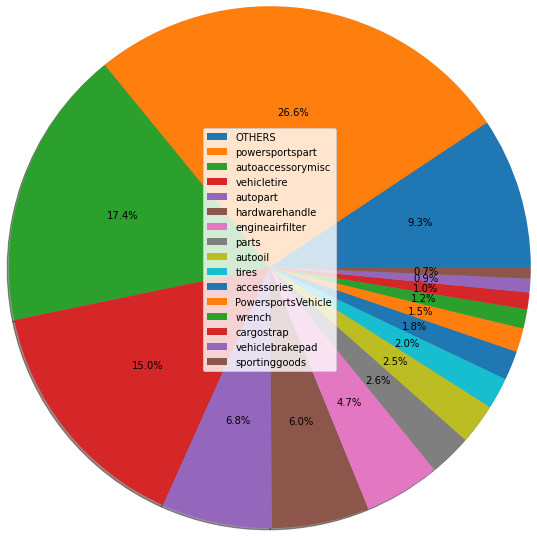

,Product Type,count,sum,percent %,mean $
0,TOTAL,11116,106129.98,100.0,9.5
1,powersportspart,3348,28181.51,26.6,8.4
2,autoaccessorymisc,2321,18417.5,17.4,7.9
3,vehicletire,914,15950.18,15.0,17.5
4,OTHERS,75,9922.44,9.3,132.3
5,autopart,819,7260.9,6.8,8.9
6,hardwarehandle,1192,6401.31,6.0,5.4
7,engineairfilter,717,4987.87,4.7,7.0
8,parts,339,2781.24,2.6,8.2
9,autooil,352,2663.23,2.5,7.6


In [42]:
persent = 0.9

df5 = f['Gross Profit'].groupby(f['Product Type']).agg('sum').reset_index(name='sum')
df6 = f['Gross Profit'].groupby(f['Product Type']).agg('count').reset_index(name='count')
df = pd.merge(df5, df6, left_on=["Product Type"], right_on=['Product Type'], how='inner').drop_duplicates()
df = df.sort_values(by=['sum'], ascending=False).reset_index()
del df['index']


df1 = pd.DataFrame({'Product Type': [], 'sum': []})
b = df["sum"].sum()*persent
a = 0
for index, row in df.iterrows():
    
    if a < b:
        df1 = df1.append(row, ignore_index=True)
        a = a + row['sum']      
        
df1['group'] = 'A'  

df2= pd.merge(df, df1, left_on=["Product Type"], right_on=['Product Type'], how='left').drop_duplicates()
df2['group'] = df2['group'].fillna("B")
del df2['sum_y']
df2.rename(columns={'sum_x': 'sum'}, inplace=True)
del df2['count_y']
df2.rename(columns={'count_x': 'count'}, inplace=True)

o = (df2.loc[df2['group'] == "B"]).agg('count').reset_index(name='count').iloc[1:]
o.columns = ['Product Type', 'count']
o['Product Type'] = o['Product Type'].replace(['count'],'OTHERS')
o = (o.loc[o['Product Type'] == "OTHERS"])

z = (df2.loc[df2['group'] == "B"]).agg('sum').reset_index(name='sum').iloc[1:]
z.columns = ['Product Type', 'sum']
z['Product Type'] = z['Product Type'].replace(['sum'],'OTHERS')
z = z.loc[z['Product Type'] == "OTHERS"]

x = pd.merge(o, z, left_on=["Product Type"], right_on=['Product Type'], how='left').drop_duplicates()

df3 = (df2.loc[df2['group'] == "A"])
df4 = df3[["Product Type","sum","count"]]

frames1 = [x, df4]
p1 = pd.concat(frames1)

print("")
print("")
print("Profit by product types.", p1["Product Type"].count(), "product types", persent*100, "% of profit")

plt.pie(p1['sum'], autopct='%1.1f%%',shadow=True, radius=3)
plt.legend(p1['Product Type'], loc="lower center")
plt.show()


p1['percent %'] = (p1['sum'] / p1['sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['Product Type'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum']/p1['count']

p1[["mean $", 'percent %']] = p1[["mean $", 'percent %']].astype(float).round(1)
p1 = p1.sort_values('sum', ascending=False).round(1).reset_index()
del p1['index']
p1



Map used by profit


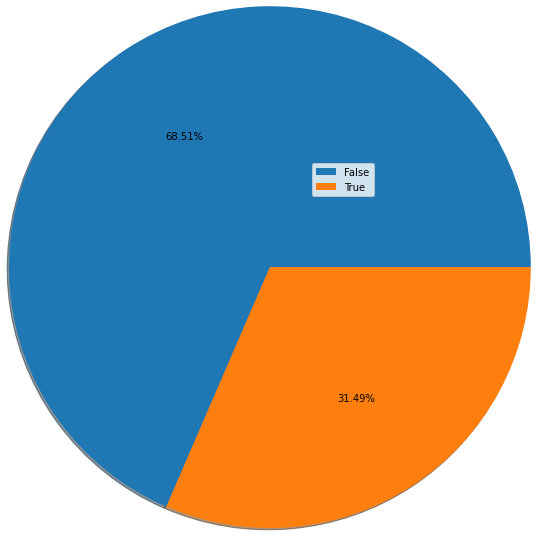

,map_used,sum,count,percent %,mean $
0,TOTAL,106865.37,12323.0,100.0,8.7
0,False,73210.9,9094,68.5,8.1
1,True,33654.47,3229,31.5,10.4


In [43]:
print("")
print("")
print("Map used by profit")


df3 = f['Gross Profit'].groupby(f['map_used']).agg('sum').reset_index(name='sum')
df4 = f['Gross Profit'].groupby(f['map_used']).agg('count').reset_index(name='count')
p1 = pd.merge(df3, df4, left_on=["map_used"], right_on=['map_used'], how='inner').drop_duplicates()

plt.pie(p1['sum'], autopct='%1.2f%%',shadow=True, radius=3)
plt.legend(p1['map_used'], loc="best")
plt.show()

p1['percent %'] = (p1['sum'] / p1['sum'].sum()) * 100
#p1 = p1.round(1)

total = p1.apply(np.sum)
total['map_used'] = 'TOTAL'
p1 = pd.concat([p1, (pd.DataFrame(total.values, index=total.keys()).T)])

p1["mean $"] = p1['sum']/p1['count']

p1[["mean $", 'percent %']] = p1[["mean $", 'percent %']].astype(float).round(1)
p1.sort_values('sum', ascending=False).round(1)

In [199]:
date1 = "2019-12-31"
date2 = "2020-07-01"

sales_df_2020_first_half = pd.read_excel(r'C:\Users\Mykola\Desktop\rollun\Az.xlsx')
sales_df_2020_first_half = sales_df_2020_first_half[(sales_df_2020_first_half["order-status"] != 'Cancelled') & (sales_df_2020_first_half["fulfillment-channel"] != 'Amazon')]
sales_df_2020_first_half = sales_df_2020_first_half[["asin", "amazon-order-id","ship-state","sku","item-price", "purchase-date"]]
sales_df_2020_first_half = sales_df_2020_first_half[(sales_df_2020_first_half['purchase-date'] > date1) & (sales_df_2020_first_half['purchase-date'] < date2)]

df = sales_df_2020_first_half['item-price'].groupby(sales_df_2020_first_half['asin']).agg('sum').reset_index(name='sum')
df = df.sort_values(by=['sum'], ascending=False).reset_index()
del df['index']
df =  df.head(200)

In [200]:
df1 = f['item-price'].groupby(f['asin']).agg('sum').reset_index(name='sum')
df1 = df1.sort_values(by=['sum'], ascending=False).reset_index()
del df1['index']
df1 =  df1.head(200)

In [196]:
df1 = f['Gross Profit'].groupby(f['asin']).agg('sum').reset_index(name='sum')
df1 = df1.sort_values(by=['sum'], ascending=False).reset_index()
del df1['index']
df1 =  df1.head(200)

In [201]:
p = pd.merge(df, df1, left_on=["asin"], right_on=['asin'], how='inner').drop_duplicates()

In [202]:
p

,asin,sum_x,sum_y
0,B01N5R25HA,6309.39,734.80
1,B00BG07IO4,4294.59,2868.12
2,B004E5GBJG,4209.27,696.02
3,B004E27O3G,3425.66,2122.46
4,B003O72GD0,3321.22,1382.70
5,B011AO22Z0,3096.45,2657.43
6,B00RNI4SUA,3013.60,2602.80
7,B01IE4JHXO,2851.74,706.80
8,B01N9Z1OV0,2848.21,842.65
9,B01N3Y7E48,2580.94,1668.90
